In [1]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Search for best hyperparameters using GridSearchCV and RandomForestRegressor

In [2]:
cars = pd.read_csv("final_cars.csv")

In [3]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [4]:
X = pd.get_dummies(X)

In [5]:
X.shape

(201, 37)

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#### Set aside some data for testing

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [20]:
model = RandomForestRegressor()
params_grid  = [{'n_estimators' : [10,20,30, 40] , 'max_depth' :[2,3,4, 6]}]

In [21]:
grid_search = GridSearchCV(model, params_grid, cv = 5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [2, 3, 4, 6],
                          'n_estimators': [10, 20, 30, 40]}])

In [22]:
## display scores 
results = grid_search.cv_results_
for score,param in zip(results['mean_test_score'], results['params']):
      print(score,param)

0.8247668090559974 {'max_depth': 2, 'n_estimators': 10}
0.8225702554919524 {'max_depth': 2, 'n_estimators': 20}
0.8328936609294184 {'max_depth': 2, 'n_estimators': 30}
0.8456730323336 {'max_depth': 2, 'n_estimators': 40}
0.8487840935698336 {'max_depth': 3, 'n_estimators': 10}
0.8378047629863726 {'max_depth': 3, 'n_estimators': 20}
0.8390494437145625 {'max_depth': 3, 'n_estimators': 30}
0.8400239879018832 {'max_depth': 3, 'n_estimators': 40}
0.845694246521988 {'max_depth': 4, 'n_estimators': 10}
0.849377254417119 {'max_depth': 4, 'n_estimators': 20}
0.8467003073976009 {'max_depth': 4, 'n_estimators': 30}
0.832450194412831 {'max_depth': 4, 'n_estimators': 40}
0.8418389339684158 {'max_depth': 6, 'n_estimators': 10}
0.8633977268555973 {'max_depth': 6, 'n_estimators': 20}
0.8488933749720754 {'max_depth': 6, 'n_estimators': 30}
0.8614464023510624 {'max_depth': 6, 'n_estimators': 40}


In [23]:
grid_search.best_params_

{'max_depth': 6, 'n_estimators': 20}

In [24]:
grid_search.best_score_

0.8633977268555973

In [25]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=6, n_estimators=20)

### Build model with best estimator

In [26]:
model = grid_search.best_estimator_

In [27]:
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)

In [29]:
r2_score(y_test,y_pred)

0.9325538522109973

In [31]:
np.sqrt(mse)

2438.644698731746

<AxesSubplot:ylabel='price'>

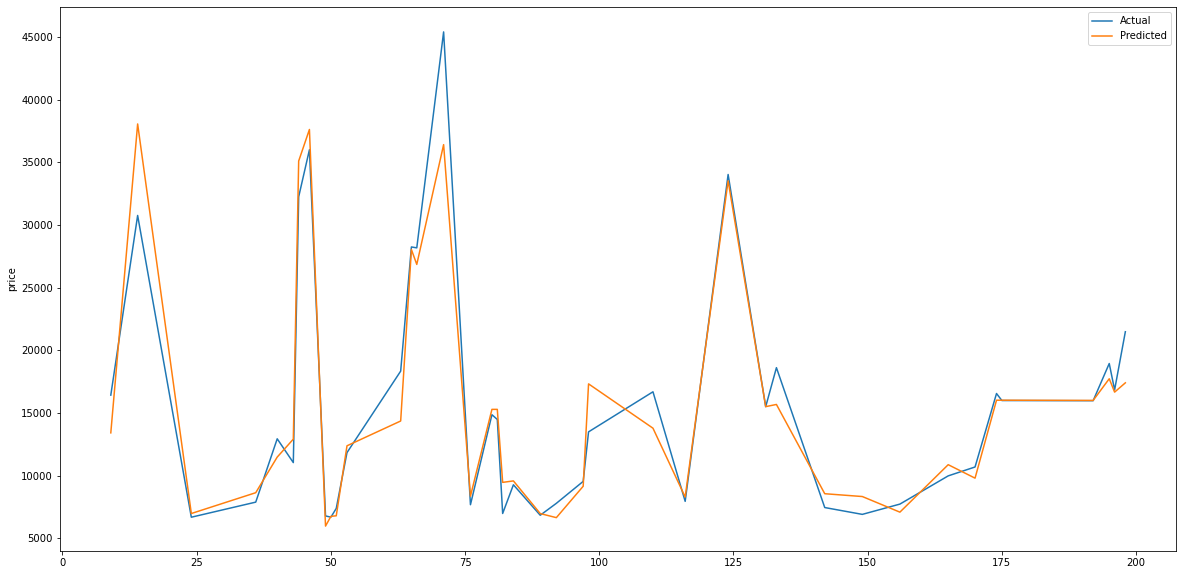

In [32]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")